<a href="https://colab.research.google.com/github/willian2610/Processamento-de-Sinais/blob/master/Aula%2002%20-%20Teorema%20de%20Nyquist%20(Willian%20de%20Vargas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Material elaborado por Willian de Vargas, com base nos materiais disponibilizados pela Professora Dra. Carla Diniz L. Becker, durante as aulas de Processamento de Sinais, ministradas para o curso de Informática Biomédica da Universidade Federal de Ciências da Saúde de Porto Alegre.

# Aula 02 - Teorema de Nyquist

Bibliotecas necessárias:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as tck

plt.style.use('ggplot') # aplica um estilo aos plots, que será aplicado a partir de agora automaticamente.
plt.rcParams['figure.figsize'] = [14, 5] #estabelece o tamanho da figura (FAÇA O AJUSTE DE ACORDO COM O TEu MONITOR)

#I. Teoria:

## Taxa de amostragem:

Taxa de amostragem é o número de amostras por segundo.


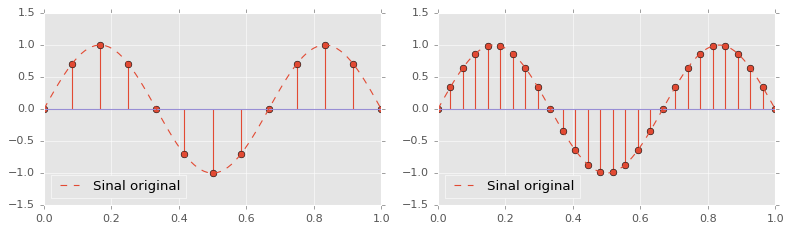


Na figura acima, um sinal é digitalizado com duas diferentes taxas de amostragem. Quanto maior é a quantidade de amostras, menor é o período de amostragem, melhor é a qualidade do sinal, porém, maior é o consumo de memória do computador para armazenar as amostras.

**O processo de amostragem é executado em intervalos regulares, de maneira similar aos quadros de um filme. Quanto mais rápida a coleta de amostras for feita, maior será a resolução e os detalhes que podem ser vistos na forma de onda.**

## Teorema de Amostragem de Nyquist:

O teorema da amostragem de **Nyquist** <ins>explica</ins> a **relação entre a taxa de amostragem e a frequência do sinal medido.**

Esse teorema diz que a taxa de amostragem **$f_s$ deve ser maior que o dobro da componente de maior frequência que você quer analisar no sinal medido**. Essa frequência muitas vezes é chamada de frequência de Nyquist, $f_N$.

$$f_s=2*f_N$$

**Equação.** A taxa de amostragem deve ser maior que duas vezes a frequência de Nyquist.

Para entender o motivo dessa exigência, observe a medição da onda senoidal em diferentes taxas.

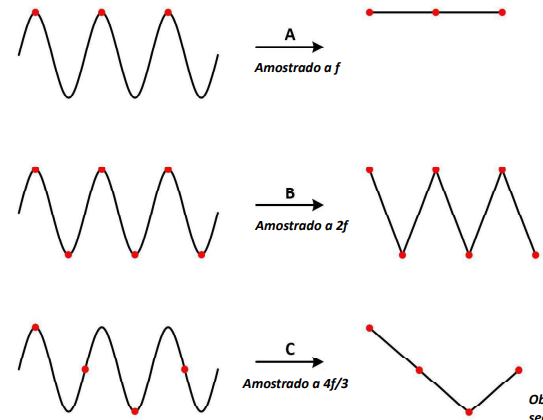

**Informações importantes sobre o sinal senoidal original acima:**
Trata-se de uma função senoidal ($f(x)=sen(x)$), cujo a distância no eixo x representa 1 segundo. COm isso, é possível aferir que a frequência do sinal ($f_0$) é de $3Hz$, ou seja, temos 3 ciclos completos em um segundo.


* **No caso A**, a taxa de amostragem é igual à frequência da onda senoidal. Essas amostras são marcadas no sinal original à esquerda e, quando reconstruídas à direita, **o sinal é visto incorretamente como uma tensão CC constante**.

* **No caso B**, a taxa de amostragem é o dobro da frequência do sinal. A onda reconstruída agora é vista como uma **forma de onda triangular**. Nessa caso, $f$ seria igual à frequência de Nyquist, que é a componente de maior frequência permitida para evitar o *aliasing* para uma data frequência de amostragem.

* **No caso C**, a taxa de amostragem é $\frac{4f}{3}$. Nesse caso, a frequência de Nyquist seria:
$$f_N=\frac{f_s}{2}=\frac{\frac{4f}{3}}{2}=\frac{2f}{3}$$

  * Como $f$ está acima da frequência de Nyquist $\frac{4f}{3} > \frac{2f}{3}$, essa taxa de amostragem reproduzirá uma forma de onda com *aliasing*, de frequência e formato incorretos!

De acordo com o Teorema de Nyquist:

A **quantidade de amostras por unidade de tempo de um sinal, chamada taxa ou frequência de amostragem**, deve ser maior que o dobro **da maior frequência contida no sinal** a ser amostrado, para que o sinal possa ser reproduzido integralmente sem erro de *aliasing*. A metade da frequência de amostragem é chamada frequência de Nyquist e corresponde ao limite máximo de frequência do sinal que pode ser reproduzido.

<ins>**Teorema de Nyquist**</ins>: **$f_s\geq2$ (largura de banda)**

* **Largura de banda = faixa de frequência do sinal em que estamos interessados.**


## Exemplo (Weeks):

Qual a mínima taxa de amostragem para o sinal abaixo? Parta da premissa que estamos interessados em todas as frequências que começam em $0Hz$.

$$ 
x(t) = cos(2\pi450t-\frac{\pi}{2})+3cos(2\pi200t+\frac{3\pi}{4})+2cos(2\pi100t+2\pi)
$$

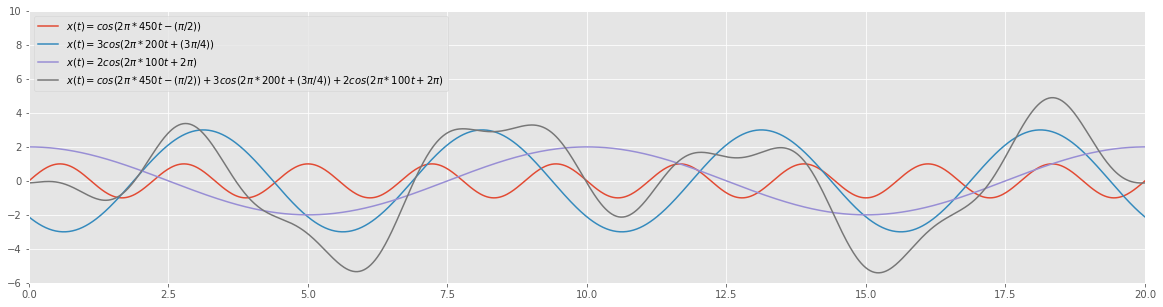

In [ ]:
t = np.linspace(0, 20, 1000) # (start, stop, number of samples)
sinal_1 = np.cos((2*np.pi)*(450*t)-(np.pi/2))
sinal_2 = 3*np.cos((2*np.pi)*(200*t)+((3*np.pi)/4))
sinal_3 = 2*np.cos((2*np.pi)*(100*t)+(2*np.pi))
sinal_4 = sinal_1+sinal_2+sinal_3

plt.figure(figsize=(20,5))
plt.plot(t, sinal_1, label="$x(t) = cos(2\pi*450t-(\pi/2))$")
plt.plot(t, sinal_2, label="$x(t) = 3cos(2\pi*200t+(3\pi/4))$")
plt.plot(t, sinal_3, label="$x(t) = 2cos(2\pi*100t+2\pi)$")
plt.plot(t, sinal_4, label="$x(t) = cos(2\pi*450t-(\pi/2)) + 3cos(2\pi*200t+(3\pi/4)) + 2cos(2\pi*100t+2\pi)$")
plt.ylim([-6, 10])
plt.xlim([0, 20])
plt.legend(loc = "upper left", )
plt.show()

**Resolução:**

$f_s=2*f_N$

* $ \text{Taxa de Nyquist} = 2*\text{(Largura de banda)} $

* $ \text{Taxa de Nyquist} = 2*[\text{max}(450Hz, 200Hz, 100Hz)-0Hz]$

* $ \text{Taxa de Nyquist} = 2*(450Hz-0Hz)$

* $ \text{Taxa de Nyquist} = 2*450Hz$

* $ \text{Taxa de Nyquist} = 900Hz$

A mínima taxa de amostragem é $900Hz$.

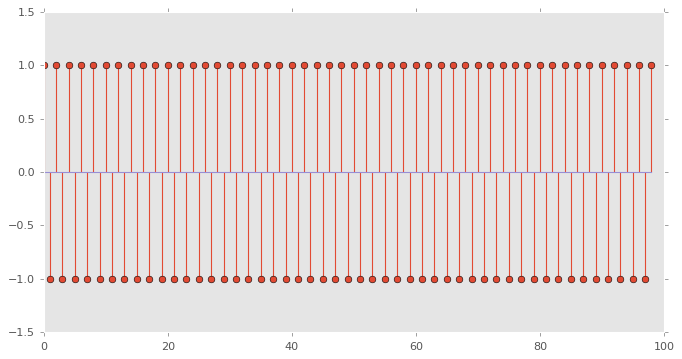

In [ ]:
# Exemplo do teorema de amostragem de Nyquist

N = 100 # Número de amostras no gráfico
f_0 = 45 # Frequência do sinal
T_s = 1/90 # Período de amostragem de 11,111ms, ou 90 amostras por segundo

n = np.arange(0, N-1)

x = np.cos(2*np.pi*f_0*n*T_s)

plt.figure(figsize=(10,5))
plt.grid()
plt.stem(n, x, use_line_collection=True)
plt.ylim([-1.5, 1.5])
plt.show()


# Exercício:

## A) Discretize o sinal contínuo para $x(t)=cos(4\pi t)$:


**OBTENDO FREQÊNCIA ANGULAR, FREQUÊNCIA DO SINAL E PERÍODO:**

**Frequência Angular($\omega_0$):**
* Propriedade: $cos(4\pi*t) = cos(\omega_0*t+\theta_0)$
  * $\omega_0 = 4\pi rad/s$

**Frequência do sinal ($f_0$):**
* $\omega_0 = 2\pi*f_0$
* $\frac{\omega_0}{2\pi} = f_0$
* $\frac{4\pi}{2\pi} = f_0$
* $2Hz = f_0$

**Período de fundamental ($T_0$):**
* $T_0 = \frac{2\pi}{\omega_0}$
* $T_0 = \frac{2\pi}{4\pi}$
* $T_0 = \frac{2}{4}$
* $T_0 = 0.5 s$

**OBTENDO A EXPRESSÃO DO SINAL DISCRETIZADO:**

Reescrevendo a função utilizando a propriedade: $cos(\pi*t) = cos(\omega_0*t+\theta_0)$

$x(t) = cos(4\pi*t) = cos( \omega_0*t)$

**Substitua:**

$\omega_0 = 2\pi*f_0$

* $x(t) = cos(2\pi*f_0*t)$ → Sinal contínuo pronto para ser discretizado.

$t = nT_s$

* $x[n] = cos[2\pi*f_0*nT_s]$ → Sinal discretizado. Agora, falta manipular esta função conforme abaixo.

**Manipulando:**

$T_s = \frac{1}{f_s}$

$x[n] = cos[2\pi*f_0*n*\frac{1}{f_s}] = cos[2\pi*\frac{f_0}{f_s}*n]$

(Considerando $fs_k = k*f_o$): $k = \frac{fs}{f0}$ → $\frac{f0}{fs}=\frac{1}{k}$

$x[n] = cos[2\pi*\frac{1}{k}*n] = cos[\frac{2\pi}{k}*n]$ 

**→ EXPRESSÃO DO SINAL DISCRETIZADO: $x[n] = cos[\frac{2\pi}{k}*n]$**

**PARTICULARIZANDO A EXPRESSÃO PARA $k = 4, 8$:**

**k = 4**
* Período:
  * $N = k$ → $N=4$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{4*2} = \frac{1}{8} = 0.125 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{4} = \frac{\pi}{2} rad/s$

Para $N=4$ temos quatro amostras por ciclo completo, ou seja, o período (ou tempo entre amostras) é de $0.125s$.

**k = 8**
* Período:
  * $N = k$ → $N=8$
* Período de amostragem:
  * $T_s = \frac{1}{N*f_0} = \frac{1}{8*2} = \frac{1}{16} = 0.0625 s$
* Frequência Ângular:
  * $\Omega_0 = \frac{2\pi}{k} = \frac{2\pi}{8} = \frac{\pi}{4} rad/s$

Para $N=8$ temos oito amostras por ciclo completo, ou seja, o período (ou tempo entre amostras) é de $0.0625s$.

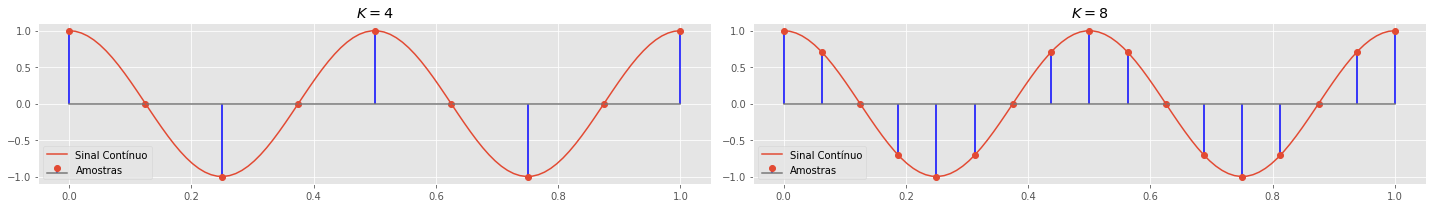

In [ ]:
N = 1
f0 = 2

t = np.linspace(0, N, 100)
x_c = np.cos(4 * np.pi * t)

plt.figure(figsize=(20,3))


# K = 4

k = 4
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)

plt.subplot(121)
plt.title("$K=4$")
plt.stem(n/(f0*k), x_d, 'blue', label="Amostras", use_line_collection=True)
plt.plot(t, x_c, label="Sinal Contínuo")
plt.legend(loc='lower left')

# K = 8

k = 8
n = np.linspace(0, N*k*f0, (N*k*f0)+1)
x_d = np.cos(((2*np.pi)/k) * n)

plt.subplot(122)
plt.title("$K=8$")
plt.stem(n/(f0*k), x_d, 'blue', label="Amostras", use_line_collection=True)
plt.plot(t, x_c, label="Sinal Contínuo")
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

## B) Considerando o teorema de Nyquist, qual deve ser a taxa de amostragem para este sinal $cos(4\pi t)$?:

* Amostre o sinal x(t) utilizando a taxa de amostragem de Nyquist e plote. 

* Comente o resultado.

* Obs.: Lembrar que $x[n]=x[nts]=cos[2\pi*f_0*nT_s]$, ou seja, $t=n*T_s$


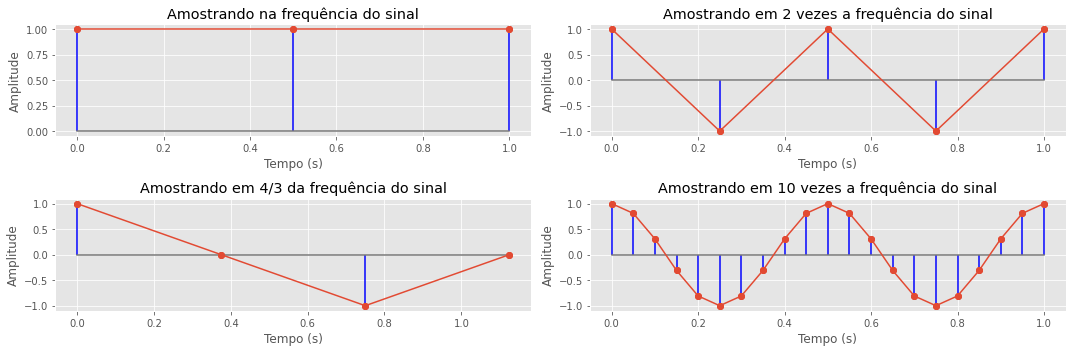

In [ ]:
#Frequencia do sinal a ser amostrado:
f0 = 2

#Plotando os resultados:

plt.figure(figsize=(15,5))

# ===== Amostrando na frequência do sinal

ts = 1/(1*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(221)
plt.title("Amostrando na frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

# ===== Amostrando em 2 vezes a frequência do sinal

ts = 1/(2*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(222)
plt.title("Amostrando em 2 vezes a frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

# ===== Amostrando em 4/3 da frequência do sinal

ts = 1/((4/3)*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(223)
plt.title("Amostrando em 4/3 da frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')

# ===== Amostrando em 10 vezes a frequência do sinal

ts = 1/(10*f0) #Período de amostragem (intervalo de tempo entre duas amostras).
t = np.arange(0,1+ts,ts) #Número de amostras no gráfico
n = np.arange(0,len(t)) # variando de zero até a última amostra a ser lida.
x = np.cos(2*np.pi*f0*n*ts) #Expandindo o argumento para uma lista de 2*pi*Ts para cada n.


plt.subplot(224)
plt.title("Amostrando em 10 vezes a frequência do sinal")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.stem(t, x, 'b',use_line_collection=True)
plt.plot(t, x, '-o')


plt.tight_layout()
plt.show()

**Discução:** Com esta demonstração, é possível notar que quando a amostragem ocorre com uma taxa menor que o dobro da frequência do sinal, a reconstrução do sinal ocorre de modo que exista uma distorção total em relação ao sinal original. Quando amostramos em 2 vezes o valor da frequência do sinal, podemos perceber que o sinal, quando reconstruído, começa a se assemelhar ao sinal original. Quanto mais alta a amostragen, mais fiel ao sinal contínuo original será a reconstrução (entretanto, mais poder computacional é exigido).